In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [ ]:
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
full_data=pd.read_csv("/content/titanic_dataset.csv")

In [ ]:
full_data.shape

(891, 12)

In [ ]:
full_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


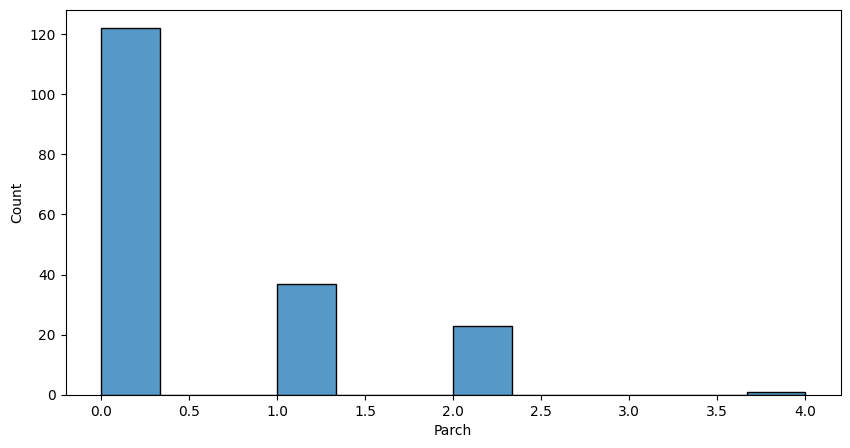

In [ ]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

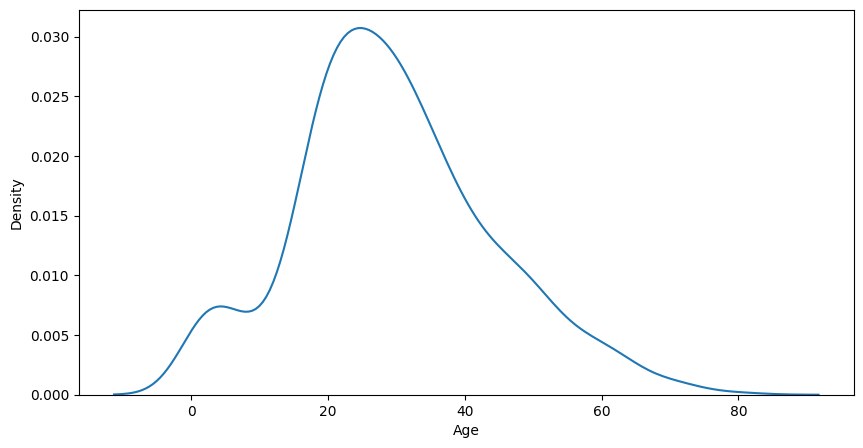

In [ ]:
sns.distplot(full_data['Age'],hist=False)
plt.show()

<Figure size 800x800 with 0 Axes>

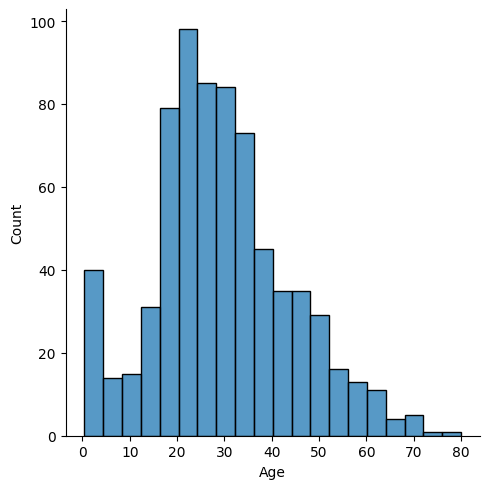

In [ ]:
plt.figure(figsize=(8,8))
sns.displot(full_data['Age'])
plt.show()

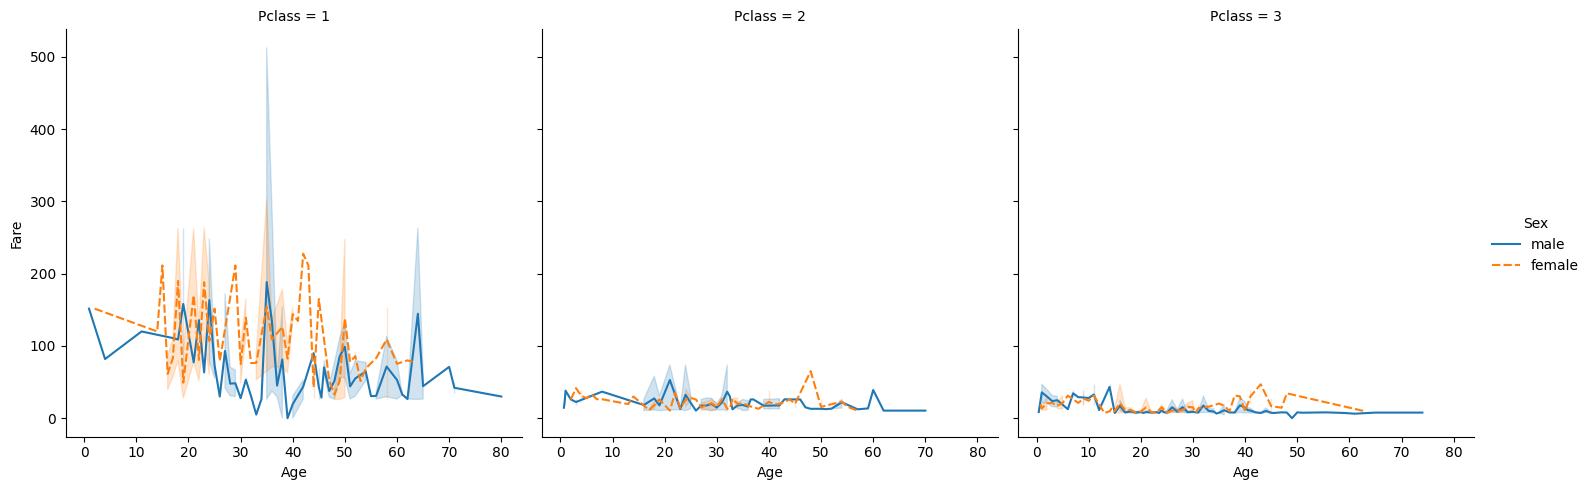

In [ ]:
sns.relplot(x="Age" ,y="Fare", col="Pclass", hue="Sex", style="Sex", kind="line", data=full_data)
plt.show()

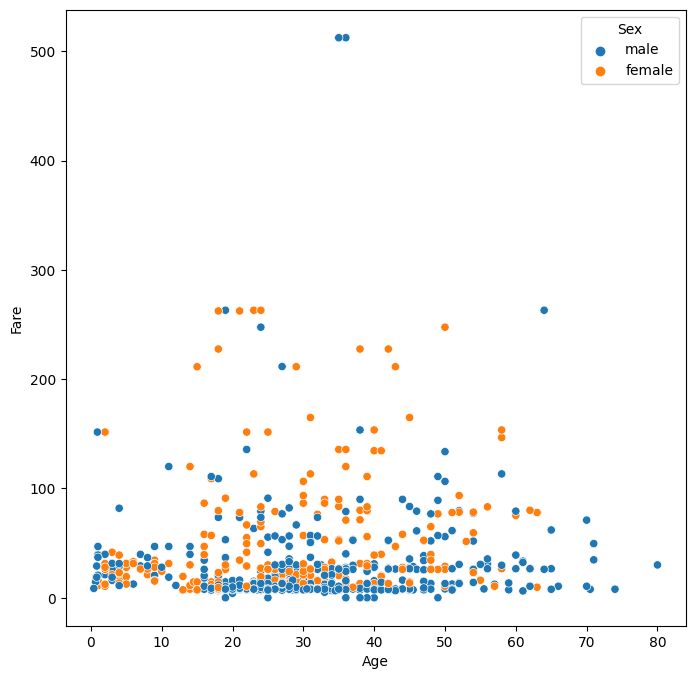

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="Fare",hue="Sex",data=full_data)
plt.show()

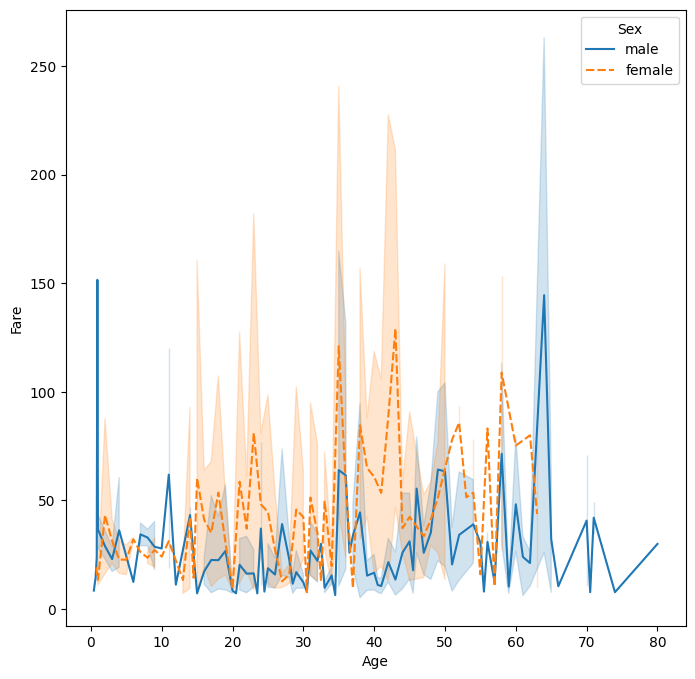

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age",y="Fare",hue="Sex",style="Sex",data=full_data)
plt.show()

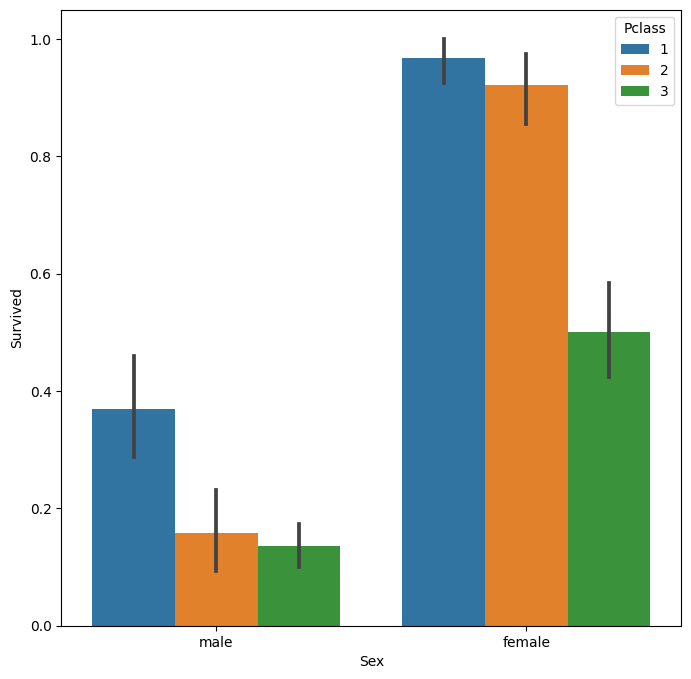

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=full_data)
plt.show()

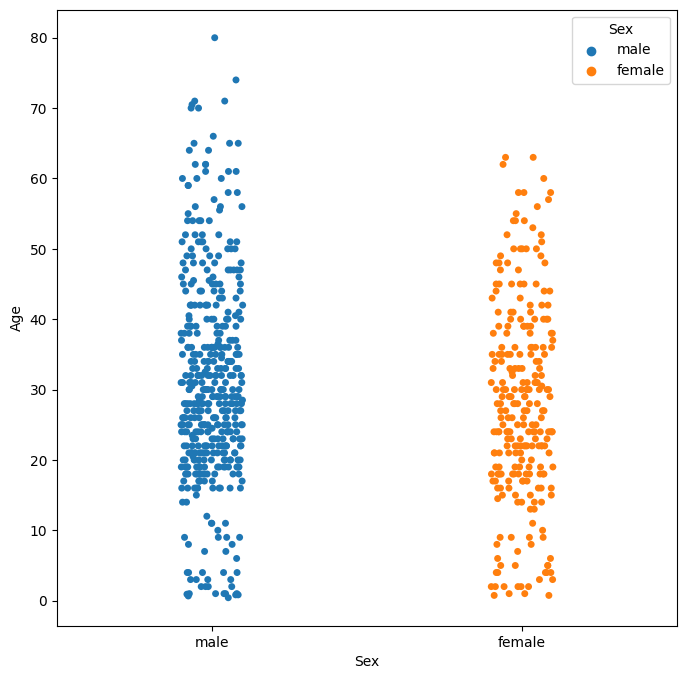

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex",y="Age",hue="Sex" ,data=full_data)
plt.show()

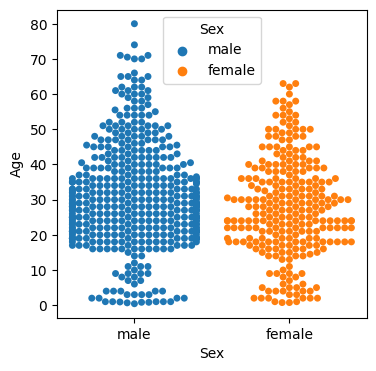

In [ ]:
plt.figure(figsize=(4,4))
sns.swarmplot(x="Sex",y="Age",hue="Sex",data=full_data)
plt.show()

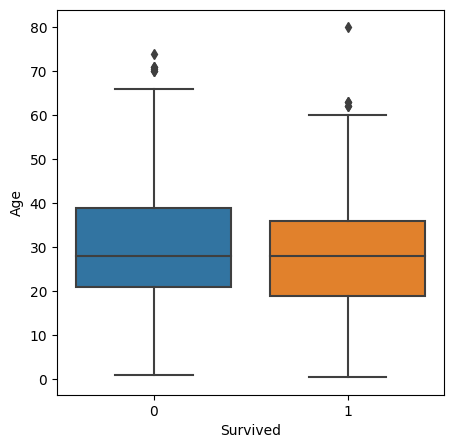

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Survived",y="Age",data=full_data)
plt.show()

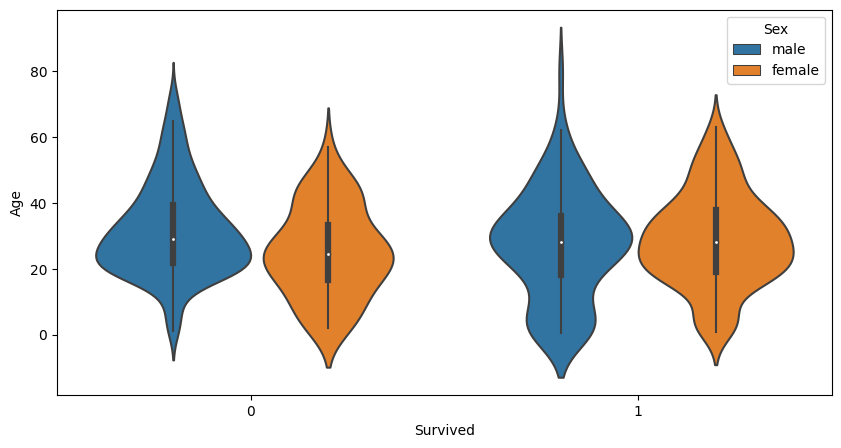

In [ ]:
sns.violinplot(x="Survived",y="Age",hue="Sex",data=full_data)
plt.show()

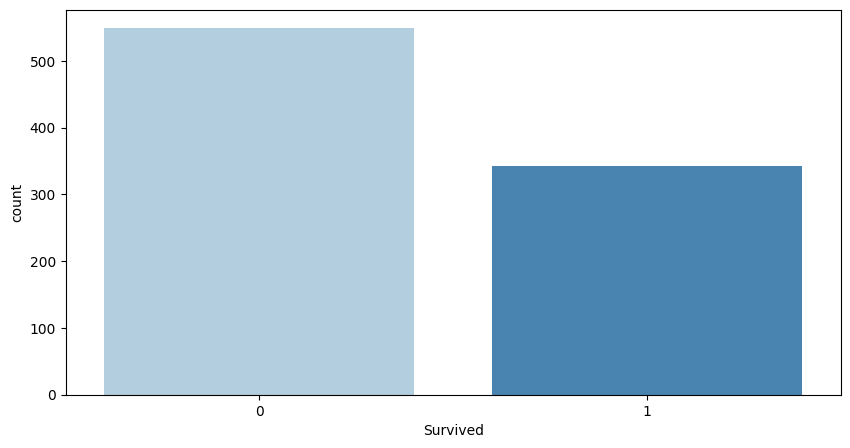

In [ ]:
sns.countplot(x="Survived",data=full_data,palette="Blues");
plt.show()

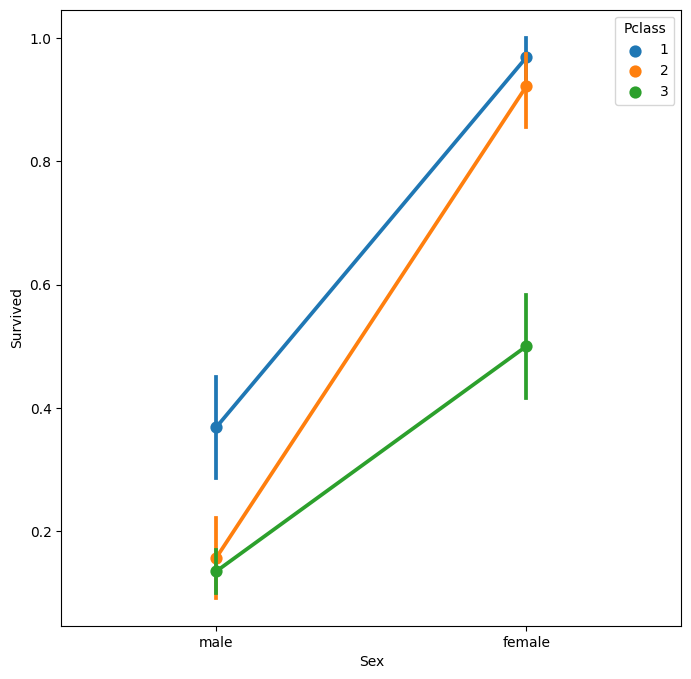

In [ ]:
plt.figure(figsize=(8,8))
sns.pointplot(x="Sex",y="Survived",hue="Pclass",data=full_data)
plt.show()

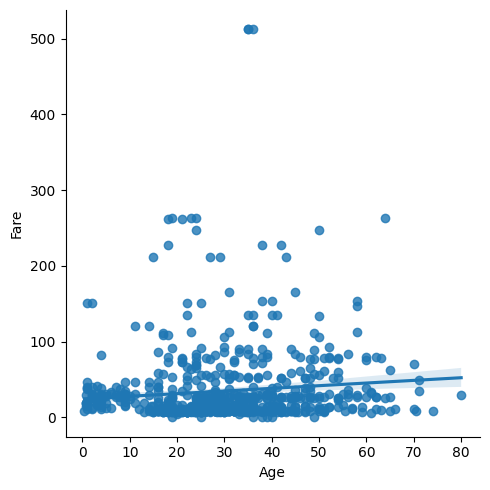

In [ ]:
sns.lmplot(x="Age",y="Fare",data=full_data)
plt.show()

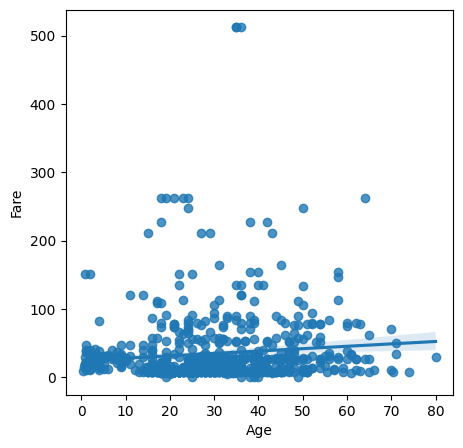

In [ ]:
plt.subplots(figsize=(5,5))
sns.regplot(x="Age",y="Fare",data=full_data)
plt.show()

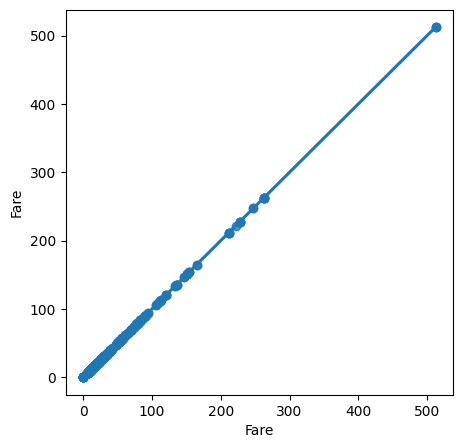

In [ ]:
plt.subplots(figsize=(5,5))
sns.regplot(x="Fare",y="Fare",data=full_data)
plt.show()

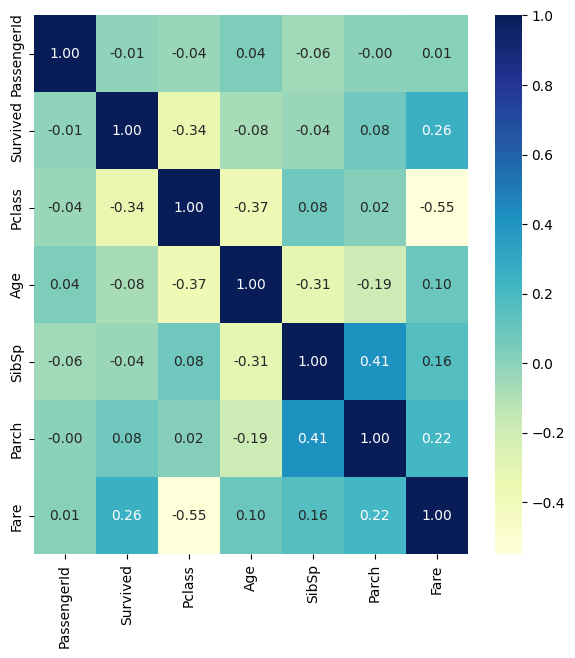

In [ ]:
plt.subplots(figsize=(7, 7))
sns.heatmap(full_data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

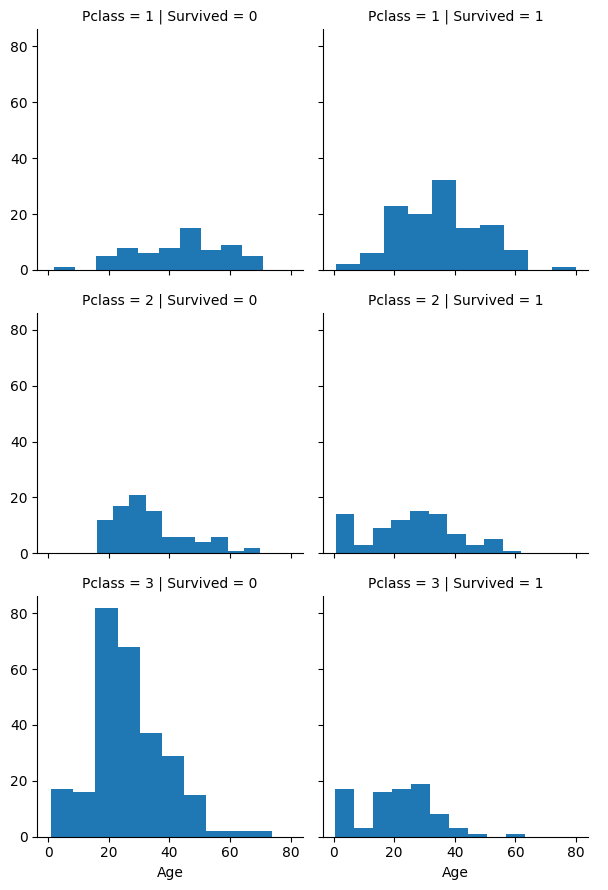

In [ ]:
g = sns.FacetGrid(full_data, col='Survived', row='Pclass')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

In [ ]:
full_data=pd.read_csv("/content/titanic_dataset.csv")

In [ ]:
print("train data:",full_data.shape)

train data: (891, 12)


In [ ]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


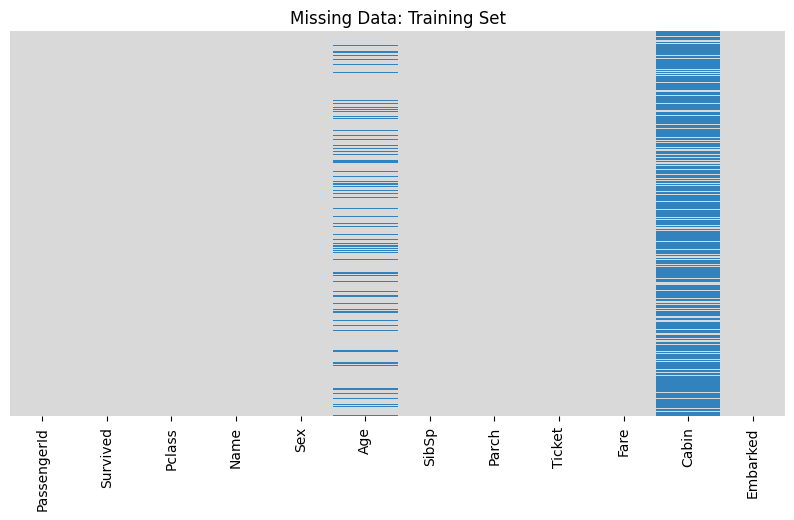

In [ ]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

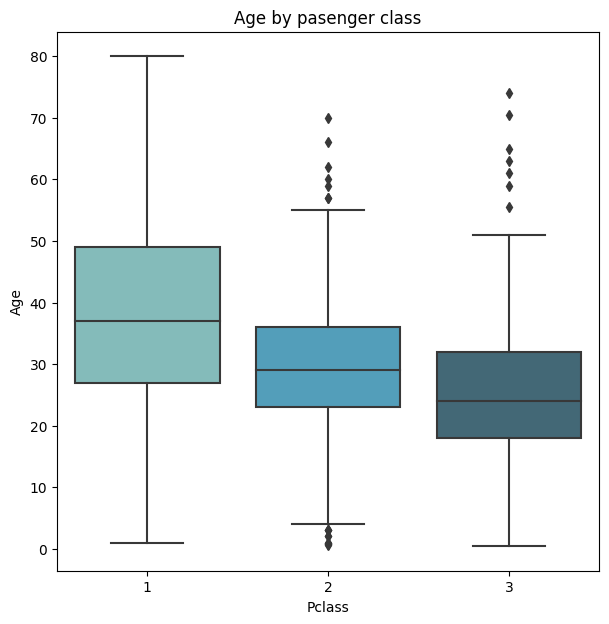

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x="Pclass",y="Age",data=full_data,palette='GnBu_d').set_title("Age by pasenger class")
plt.show()

In [ ]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass == 1:

      return 37

    elif Pclass == 2:
      return 29

    else:
        return 24

  else:
          return Age
  full_data["Age"]=full_data[["Age","Pclass"]].apply(impute_age,axis=1)

In [ ]:
full_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
full_data.dropna(inplace=True)

In [ ]:
full_data.drop(['Name','Ticket'],axis=1,inplace=True)
objact=['Sex','Embarked']
for colname in objact:
  full_data[colname]=full_data[colname].astype('category')

In [ ]:
full_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.636236,0.039326,0.778090
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
full_data.drop('PassengerId', inplace= True ,axis=1)

In [ ]:
full_data.shape

(712, 11)

In [ ]:
full_data.select_dtypes(['category']).columns

Index([], dtype='object')

In [ ]:
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

KeyError: ignored

In [ ]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
full_data=pd.concat([full_data,sex,embarked],axis=1)
full_data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [ ]:
full_data.drop(["Sex","Embarked"],axis=1,inplace=True)
print("train full data shape",full_data.shape)
full_data.head()

KeyError: ignored

In [ ]:
x=full_data.drop('Survived',axis=1)
y=full_data["Survived"]
from sklearn.model_selection import train_test_split
x_train , x_test, y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


ValueError: ignored

In [ ]:
y_pred_lreg=lreg.predict(x_test)
print(y_pred_lreg)

[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_lreg = lreg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
lreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', lreg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 64.86 %


**Dcision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DecisiontreeClassifier")
Dtree=DecisionTreeClassifier()
Dtree.fit(x_train,y_train)

DecisiontreeClassifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_Dtree=Dtree.predict(x_train)
print("--"*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

------------------------------------------------------------


ValueError: ignored

**Random** **forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('Randomforestclassifire')
rfc=RandomForestClassifier()
rfc.fir(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy score
y_pred_rfc=rfc.predict(x_test)
print('Randomtreeclassifier')
print('--'*30)
rfc_accuracy=round(accuracy_score(y_test,y_pred_rfc)*100,2)
print('Accuracy'rfc_accuracy,"%")

**Gradient** **Boosting** **classifier**
# New Section


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
print('Gradientboostingclassifier')
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


In [ ]:
from sklearn.metrics import  accuracy_score
y_pred_gbc=gbc.predict(x_test)
print('Gradientboostingclassifier')
print('--'*30)
gbc_accuracy=round(accuracy_score(y_test,y_pred_gbc)*100,2)
print("Accuaracy",gbc_accuracy,'%')

In [ ]:
model_scores ={
    "Logistic Regresstion":
    "Decision Tree classifier":
    "Forest Tree classifier":
    "Gradient Boosting classifier":
}
    sorted_scores=sorted(model_score.items(),key=lambda x:x[1].reverse=True)
    print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")
